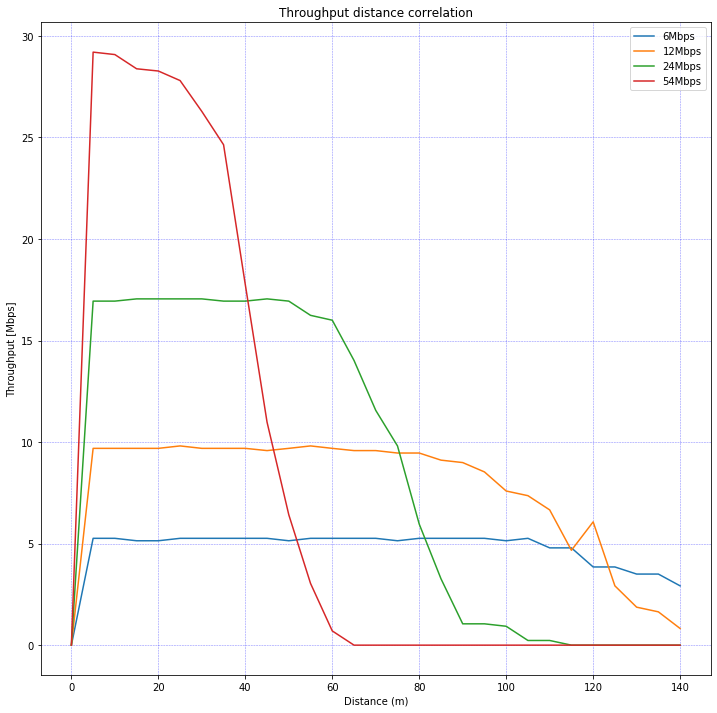

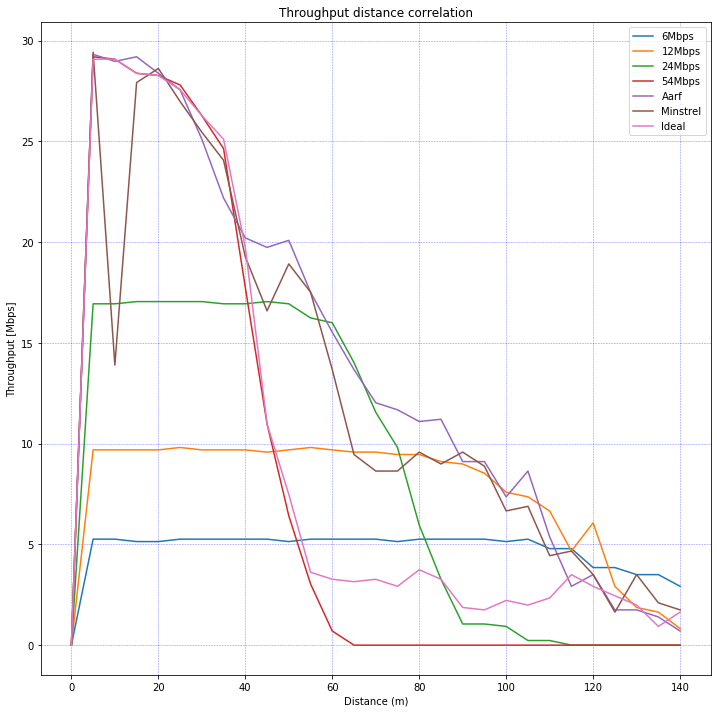

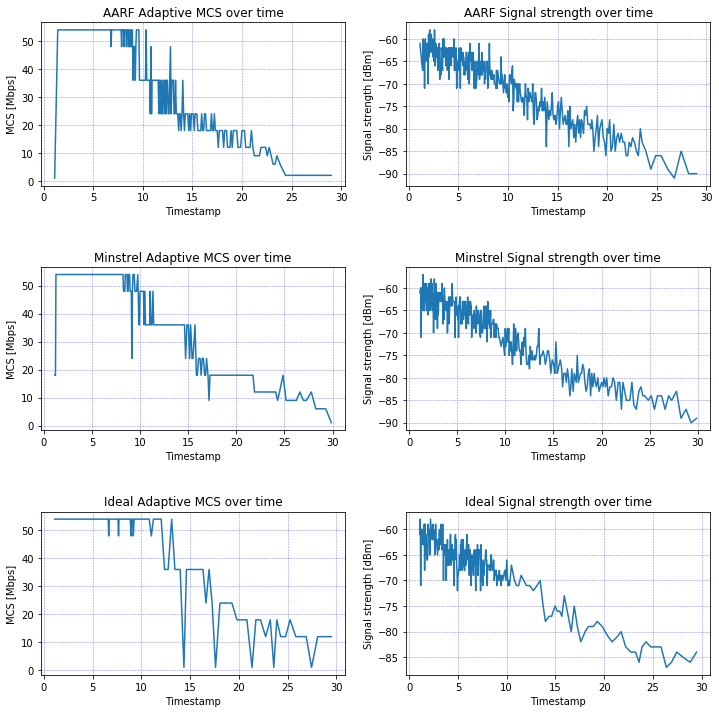

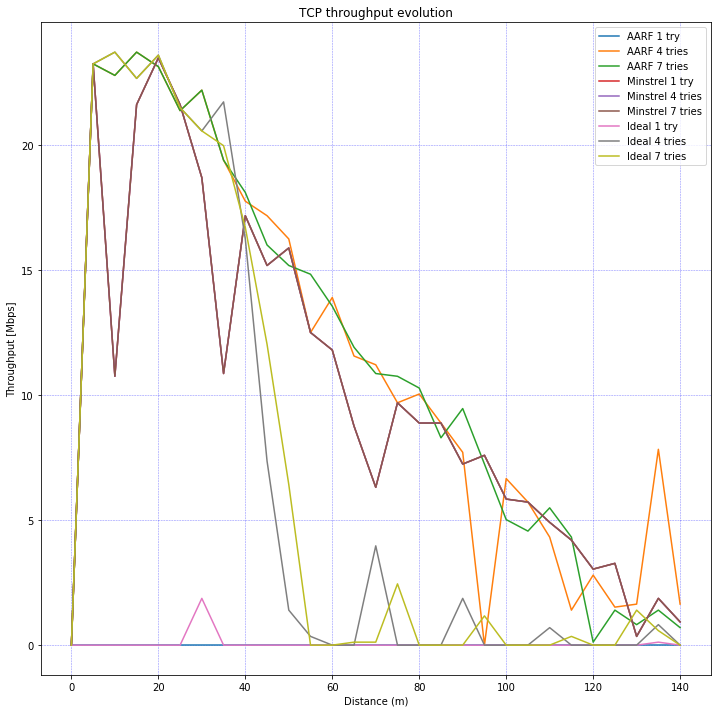

In [2]:
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
 
# Calea absoluta catre fisierul de date din care citim
# TODO - trebuie inlocuita cu calea corecta
DATA_FILE_ERP_6 = '/home/student/ns-3-dev/ErpOfdmRate6Mbps.txt'
DATA_FILE_ERP_12 = '/home/student/ns-3-dev/ErpOfdmRate12Mbps.txt'
DATA_FILE_ERP_24 = '/home/student/ns-3-dev/ErpOfdmRate24Mbps.txt'
DATA_FILE_ERP_54 = '/home/student/ns-3-dev/ErpOfdmRate54Mbps.txt'

DATA_FILE_aarf = '/home/student/ns-3-dev/aarf.txt'
DATA_FILE_minstrel = '/home/student/ns-3-dev/minstrel.txt'
DATA_FILE_ideal = '/home/student/ns-3-dev/ideal.txt'

DATA_TSHARK_AARF = '/home/student/ns-3-dev/udp_frames_aarf.txt'
DATA_TSHARK_MINSTREL = '/home/student/ns-3-dev/udp_frames_minstrel.txt'
DATA_TSHARK_IDEAL = '/home/student/ns-3-dev/udp_frames_ideal.txt'

DATA_TCP_AARF_1_TRIES = '/home/student/ns-3-dev/tcp_Aarf_1.txt'
DATA_TCP_AARF_4_TRIES = '/home/student/ns-3-dev/tcp_Aarf_4.txt'
DATA_TCP_AARF_7_TRIES = '/home/student/ns-3-dev/tcp_Aarf_7.txt'
DATA_TCP_MINSTREL_1_TRIES = '/home/student/ns-3-dev/tcp_Minstrel_1.txt'
DATA_TCP_MINSTREL_4_TRIES = '/home/student/ns-3-dev/tcp_Minstrel_4.txt'
DATA_TCP_MINSTREL_7_TRIES = '/home/student/ns-3-dev/tcp_Minstrel_7.txt'
DATA_TCP_IDEAL_1_TRIES = '/home/student/ns-3-dev/tcp_Ideal_1.txt'
DATA_TCP_IDEAL_4_TRIES = '/home/student/ns-3-dev/tcp_Ideal_4.txt'
DATA_TCP_IDEAL_7_TRIES = '/home/student/ns-3-dev/tcp_Ideal_7.txt'


columns = ['distance', 'throughput']
tshark_columns = ['timestamp', 'mcs', 'signal_strength']
 
sim_data_erp_6 = np.genfromtxt(DATA_FILE_ERP_6, delimiter=' ', names=columns, dtype=None)
sim_data_erp_12 = np.genfromtxt(DATA_FILE_ERP_12, delimiter=' ', names=columns, dtype=None)
sim_data_erp_24 = np.genfromtxt(DATA_FILE_ERP_24, delimiter=' ', names=columns, dtype=None)
sim_data_erp_54 = np.genfromtxt(DATA_FILE_ERP_54, delimiter=' ', names=columns, dtype=None)

sim_data_erp_aarf = np.genfromtxt(DATA_FILE_aarf, delimiter=' ', names=columns, dtype=None)
sim_data_erp_minstrel = np.genfromtxt(DATA_FILE_minstrel, delimiter=' ', names=columns, dtype=None)
sim_data_erp_ideal = np.genfromtxt(DATA_FILE_ideal, delimiter=' ', names=columns, dtype=None)

sim_data_tshark_aarf =  np.genfromtxt(DATA_TSHARK_AARF, delimiter='\t', names=tshark_columns, dtype=None)
sim_data_tshark_minstrel =  np.genfromtxt(DATA_TSHARK_MINSTREL, delimiter='\t', names=tshark_columns, dtype=None)
sim_data_tshark_ideal =  np.genfromtxt(DATA_TSHARK_IDEAL, delimiter='\t', names=tshark_columns, dtype=None)

sim_data_tcp_aarf_1 = np.genfromtxt(DATA_TCP_AARF_1_TRIES, delimiter=' ', names=columns, dtype=None)
sim_data_tcp_aarf_4 = np.genfromtxt(DATA_TCP_AARF_4_TRIES, delimiter=' ', names=columns, dtype=None)
sim_data_tcp_aarf_7 = np.genfromtxt(DATA_TCP_AARF_7_TRIES, delimiter=' ', names=columns, dtype=None)
sim_data_tcp_minstrel_1 = np.genfromtxt(DATA_TCP_MINSTREL_1_TRIES, delimiter=' ', names=columns, dtype=None)
sim_data_tcp_minstrel_4 = np.genfromtxt(DATA_TCP_MINSTREL_4_TRIES, delimiter=' ', names=columns, dtype=None)
sim_data_tcp_minstrel_7 = np.genfromtxt(DATA_TCP_MINSTREL_7_TRIES, delimiter=' ', names=columns, dtype=None)
sim_data_tcp_ideal_1 = np.genfromtxt(DATA_TCP_IDEAL_1_TRIES, delimiter=' ', names=columns, dtype=None)
sim_data_tcp_ideal_4 = np.genfromtxt(DATA_TCP_IDEAL_4_TRIES, delimiter=' ', names=columns, dtype=None)
sim_data_tcp_ideal_7 = np.genfromtxt(DATA_TCP_IDEAL_7_TRIES, delimiter=' ', names=columns, dtype=None)


def plot_throughput_distance_fixed_mcs(
    sim_data_erp_6, sim_data_erp_12, sim_data_erp_24, sim_data_erp_54):
    fig, ax = plt.subplots(figsize=(12,12))
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    
    plt.xlabel('Distance (m)')
    plt.ylabel('Throughput [Mbps]')
    plt.title('Throughput distance correlation')
 
    ax.plot(sim_data_erp_6['distance'][::10], sim_data_erp_6['throughput'][::10], label='6Mbps')
    ax.plot(sim_data_erp_12['distance'][::10], sim_data_erp_12['throughput'][::10], label='12Mbps')
    ax.plot(sim_data_erp_24['distance'][::10], sim_data_erp_24['throughput'][::10], label='24Mbps')
    ax.plot(sim_data_erp_54['distance'][::10], sim_data_erp_54['throughput'][::10], label='54Mbps')
    ax.legend()
 
    plt.savefig('fixed_mcs.png')
    plt.show()

    
def plot_throughput_distance_fixed_and_adaptive_mcs(
    sim_data_erp_6, sim_data_erp_12, sim_data_erp_24, sim_data_erp_54, 
    sim_data_erp_aarf, sim_data_erp_minstrel, sim_data_erp_ideal
):
    fig, ax = plt.subplots(figsize=(12,12))
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    
    plt.xlabel('Distance (m)')
    plt.ylabel('Throughput [Mbps]')
    plt.title('Throughput distance correlation')
 
    ax.plot(sim_data_erp_6['distance'][::10], sim_data_erp_6['throughput'][::10], label='6Mbps')
    ax.plot(sim_data_erp_12['distance'][::10], sim_data_erp_12['throughput'][::10], label='12Mbps')
    ax.plot(sim_data_erp_24['distance'][::10], sim_data_erp_24['throughput'][::10], label='24Mbps')
    ax.plot(sim_data_erp_54['distance'][::10], sim_data_erp_54['throughput'][::10], label='54Mbps')
    ax.plot(sim_data_erp_aarf['distance'][::10], sim_data_erp_aarf['throughput'][::10], label='Aarf')
    ax.plot(sim_data_erp_minstrel['distance'][::10], sim_data_erp_minstrel['throughput'][::10], label='Minstrel')
    ax.plot(sim_data_erp_ideal['distance'][::10], sim_data_erp_ideal['throughput'][::10], label='Ideal')
    ax.legend()
 
    plt.savefig('fixed_vs_adaptive_mcs.png')
    plt.show()

def plot_tshark_adaptive_mcs_and_signal_strength(sim_data_tshark_aarf, sim_data_tshark_minstrel, sim_data_tshark_ideal):
    fig, ax = plt.subplots(3, 2, figsize=(12,12))
    
    # AARF
    ax[0][0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    ax[0][0].set_xlabel('Timestamp')
    ax[0][0].set_ylabel('MCS [Mbps]')
    ax[0][0].set_title('AARF Adaptive MCS over time')
 
    ax[0][1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    ax[0][1].set_xlabel('Timestamp')
    ax[0][1].set_ylabel('Signal strength [dBm]')
    ax[0][1].set_title('AARF Signal strength over time')
    
    ax[0][0].plot(sim_data_tshark_aarf['timestamp'][::100], sim_data_tshark_aarf['mcs'][::100])
    ax[0][1].plot(sim_data_tshark_aarf['timestamp'][::100], sim_data_tshark_aarf['signal_strength'][::100])
    
    # Minstrel
    ax[1][0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    ax[1][0].set_xlabel('Timestamp')
    ax[1][0].set_ylabel('MCS [Mbps]')
    ax[1][0].set_title('Minstrel Adaptive MCS over time')
 
    ax[1][1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    ax[1][1].set_xlabel('Timestamp')
    ax[1][1].set_ylabel('Signal strength [dBm]')
    ax[1][1].set_title('Minstrel Signal strength over time')
    
    ax[1][0].plot(sim_data_tshark_minstrel['timestamp'][::100], sim_data_tshark_minstrel['mcs'][::100])
    ax[1][1].plot(sim_data_tshark_minstrel['timestamp'][::100], sim_data_tshark_minstrel['signal_strength'][::100])
    
    # Ideal
    ax[2][0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    ax[2][0].set_xlabel('Timestamp')
    ax[2][0].set_ylabel('MCS [Mbps]')
    ax[2][0].set_title('Ideal Adaptive MCS over time')
 
    ax[2][1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    ax[2][1].set_xlabel('Timestamp')
    ax[2][1].set_ylabel('Signal strength [dBm]')
    ax[2][1].set_title('Ideal Signal strength over time')
    
    ax[2][0].plot(sim_data_tshark_ideal['timestamp'][::100], sim_data_tshark_ideal['mcs'][::100])
    ax[2][1].plot(sim_data_tshark_ideal['timestamp'][::100], sim_data_tshark_ideal['signal_strength'][::100])

    fig.subplots_adjust(hspace=0.5)
    plt.savefig('adaptive_mcs_signal_strength.png')
    plt.show()


def plot_tcp_adaptive_mcs_throughput(
    sim_data_tcp_aarf_1, sim_data_tcp_aarf_4, sim_data_tcp_aarf_7,
    sim_data_tcp_minstrel_1, sim_data_tcp_minstrel_4, sim_data_tcp_minstrel_7,
    sim_data_tcp_ideal_1, sim_data_tcp_ideal_4, sim_data_tcp_ideal_7
):
    fig, ax = plt.subplots(figsize=(12,12))
    
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Throughput [Mbps]')
    ax.set_title('TCP throughput evolution')
 
    ax.plot(sim_data_tcp_aarf_1['distance'][::10], sim_data_tcp_aarf_1['throughput'][::10], label='AARF 1 try')
    ax.plot(sim_data_tcp_aarf_4['distance'][::10], sim_data_tcp_aarf_4['throughput'][::10], label='AARF 4 tries')
    ax.plot(sim_data_tcp_aarf_7['distance'][::10], sim_data_tcp_aarf_7['throughput'][::10], label='AARF 7 tries')

    ax.plot(sim_data_tcp_minstrel_1['distance'][::10], sim_data_tcp_minstrel_1['throughput'][::10], label='Minstrel 1 try')
    ax.plot(sim_data_tcp_minstrel_4['distance'][::10], sim_data_tcp_minstrel_4['throughput'][::10], label='Minstrel 4 tries')
    ax.plot(sim_data_tcp_minstrel_7['distance'][::10], sim_data_tcp_minstrel_7['throughput'][::10], label='Minstrel 7 tries')
    
    ax.plot(sim_data_tcp_ideal_1['distance'][::10], sim_data_tcp_ideal_1['throughput'][::10], label='Ideal 1 try')
    ax.plot(sim_data_tcp_ideal_4['distance'][::10], sim_data_tcp_ideal_4['throughput'][::10], label='Ideal 4 tries')
    ax.plot(sim_data_tcp_ideal_7['distance'][::10], sim_data_tcp_ideal_7['throughput'][::10], label='Ideal 7 tries')
    
    ax.legend()
    plt.savefig('tcp_adaptive_mcs_tput.png')
    plt.show()


if __name__ == '__main__':
    plot_throughput_distance_fixed_mcs(
        sim_data_erp_6, sim_data_erp_12, sim_data_erp_24, sim_data_erp_54
    )
    plot_throughput_distance_fixed_and_adaptive_mcs(
        sim_data_erp_6, sim_data_erp_12, sim_data_erp_24, sim_data_erp_54, 
        sim_data_erp_aarf, sim_data_erp_minstrel, sim_data_erp_ideal
    )
    plot_tshark_adaptive_mcs_and_signal_strength(sim_data_tshark_aarf, sim_data_tshark_minstrel, sim_data_tshark_ideal)
    plot_tcp_adaptive_mcs_throughput(
        sim_data_tcp_aarf_1, sim_data_tcp_aarf_4, sim_data_tcp_aarf_7,
        sim_data_tcp_minstrel_1, sim_data_tcp_minstrel_4, sim_data_tcp_minstrel_7,
        sim_data_tcp_ideal_1, sim_data_tcp_ideal_4, sim_data_tcp_ideal_7
    )
